In [1]:
# To make debugging of logistic_regression module easier we enable imported modules autoreloading feature.
# By doing this you may change the code of logistic_regression library and all these changes will be available here.
%load_ext autoreload
%autoreload 2

# Add project root folder to module loading paths.
import sys
sys.path.append('../..')

In [2]:
# Import 3rd party dependencies.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import custom linear regression implementation.
from homemade.logistic_regression import LogisticRegression

In [3]:
# Load the data.
data = pd.read_csv('../../data/microchips_tests.csv')

# Print the data table.
data.head(10)

,param_1,param_2,validity
0,0.051267,0.699560,1
1,-0.092742,0.684940,1
2,-0.213710,0.692250,1
3,-0.375000,0.502190,1
4,-0.513250,0.465640,1
5,-0.524770,0.209800,1
6,-0.398040,0.034357,1
7,-0.305880,-0.192250,1
8,0.016705,-0.404240,1
9,0.131910,-0.513890,1


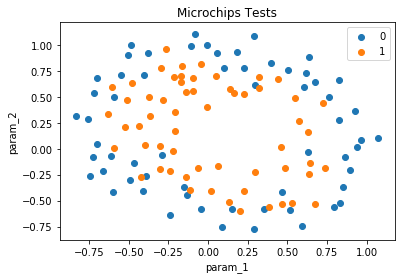

In [4]:
validities = [0, 1]

x_axis = 'param_1'
y_axis = 'param_2'

for validity in validities:
    plt.scatter(
        data[x_axis][data['validity'] == validity],
        data[y_axis][data['validity'] == validity],
        label=validity
    )

plt.xlabel(x_axis)
plt.ylabel(y_axis)
plt.title('Microchips Tests')
plt.legend()
plt.show()

In [5]:
num_examples = data.shape[0]

x_train = data[[x_axis, y_axis]].values.reshape((num_examples, 2))

y_train = data['validity'].values.reshape((num_examples, 1))

In [6]:
# Set up linear regression parameters.
max_iterations = 100000  # Max number of gradient descent iterations.
regularization_param = 0  # Helps to fight model overfitting.
polynomial_degree = 4  # The degree of additional polynomial features.
sinusoid_degree = 0  # The degree of sinusoid parameter multipliers of additional features.

# Init logistic regression instance.
logistic_regression = LogisticRegression(x_train, y_train, polynomial_degree, sinusoid_degree)

# Train logistic regression.
(thetas, costs) = logistic_regression.train(regularization_param, max_iterations)

pd.DataFrame(thetas.T)

,0,1
0,-3.040355,3.030662
1,0.916955,-0.945259
2,-1.152505,1.111014
3,-0.771658,0.816594
4,6.043862,-5.970960
5,2.927590,-2.873107
6,-8.141133,8.195278
7,-13.218318,13.403799
8,-22.240853,22.486644
9,-10.842197,10.983047


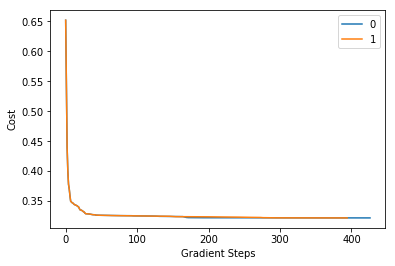

In [7]:
# Draw gradient descent progress for each label.
labels = logistic_regression.unique_labels

plt.plot(range(len(costs[0])), costs[0], label=labels[0])
plt.plot(range(len(costs[1])), costs[1], label=labels[1])

plt.xlabel('Gradient Steps')
plt.ylabel('Cost')
plt.legend()
plt.show()

In [8]:
y_train_predictions = logistic_regression.predict(x_train)
precision = np.sum(y_train_predictions == y_train) / y_train.shape[0] * 100
print('Precision: {:5.4f}%'.format(precision))

Precision: 84.7458%


In [9]:
num_examples = x_train.shape[0]

samples = 150

x_min = np.min(x_train[:, 0])
x_max = np.max(x_train[:, 0])

y_min = np.min(x_train[:, 1])
y_max = np.max(x_train[:, 1])

X = np.linspace(x_min, x_max, samples)
Y = np.linspace(y_min, y_max, samples)
Z = np.zeros((samples, samples))

for x_index, x in enumerate(X):
    for y_index, y in enumerate(Y):
        data = np.array([[x, y]])
        Z[x_index][y_index] = logistic_regression.predict(data)[0][0]

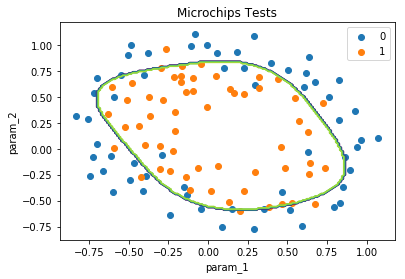

In [10]:
positives = (y_train == 1).flatten()
negatives = (y_train == 0).flatten()

plt.scatter(x_train[negatives, 0], x_train[negatives, 1], label='0')
plt.scatter(x_train[positives, 0], x_train[positives, 1], label='1')

plt.contour(X, Y, Z)

plt.xlabel('param_1')
plt.ylabel('param_2')
plt.title('Microchips Tests')
plt.legend()

plt.show()